# Explication :
- Classification des prix : Nous utilisons les quartiles des prix pour créer les catégories : "arnaque", "peu élevé", "normal", et "élevé".
- Régression logistique : Nous entraînons un modèle de régression logistique pour classer les prix en fonction de la surface, du nombre de chambres, et du nombre de fenêtres.
- Affichage : Le graphique scatter montre les prix en fonction de la surface, avec les couleurs représentant les différentes catégories.

c:\Users\julie\anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\julie\AppData\Local\Temp\ipykernel_30776\3741057893.py:66: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('coolwarm', 4), edgecolor='k')


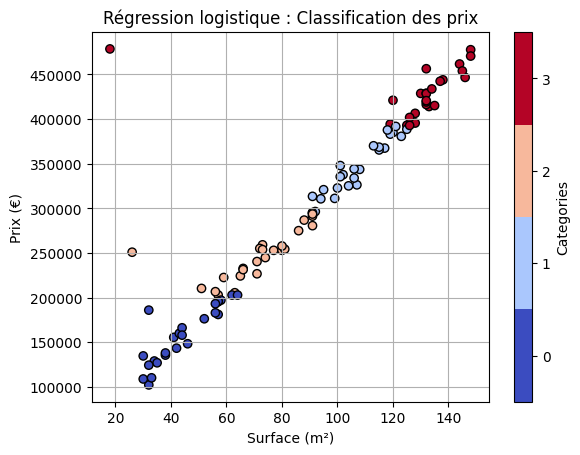

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Création du DataFrame avec les données fournies

df = pd.read_csv('appartements.csv')

# Séparation des variables indépendantes (X) et de la variable dépendante (y)
X = df[['surface']]
y = df['price']


# Initialisation du modèle de régression logistique
model = LogisticRegression(max_iter=200)


# Définir des classes de prix en utilisant les quartiles
quartiles = df['price'].quantile([0.25, 0.5, 0.75])


def classify_price(price):
    if price <= quartiles[0.25]:
        return 'arnaque'
    elif price <= quartiles[0.5]:
        return 'peu élevé'
    elif price <= quartiles[0.75]:
        return 'normal'
    else:
        return 'élevé'


# Ajouter une colonne 'price_category' en fonction du prix
df['price_category'] = df['price'].apply(classify_price)

# Encodage des catégories de prix
label_encoder = LabelEncoder()
df['price_category_encoded'] = label_encoder.fit_transform(
    df['price_category'])

# Extraction des variables indépendantes et dépendantes
X = df[['surface', 'nbRooms', 'nbWindows']]  # Variables explicatives
y = df['price_category_encoded']  # Variable cible (catégories de prix)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression logistique
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Visualisation des catégories de prix
colors = ['red', 'green', 'blue', 'orange']
categories = label_encoder.inverse_transform([0, 1, 2, 3])

# Tracer les données d'entraînement
plt.scatter(df['surface'], df['price'], c=df['price_category_encoded'],
            cmap=plt.cm.get_cmap('coolwarm', 4), edgecolor='k')

# Afficher les catégories
plt.colorbar(ticks=[0, 1, 2, 3], label='Categories')
plt.clim(-0.5, 3.5)
plt.title('Régression logistique : Classification des prix')
plt.xlabel('Surface (m²)')
plt.ylabel('Prix (€)')
plt.grid(True)
plt.show()